📌 First 5 Rows of the Dataset:
   Recency  Frequency  Monetary  Time  Class
0        2         50     12500    99      1
1        0         13      3250    28      1
2        1         17      4000    36      1
3        2         20      5000    45      1
4        1         24      6000    77      0

📊 Statistical Summary:
          Recency   Frequency      Monetary        Time       Class
count  748.000000  748.000000    748.000000  748.000000  748.000000
mean     9.506684    5.516043   1378.676471   34.284759    0.237968
std      8.095396    5.841825   1459.826781   24.380307    0.426124
min      0.000000    1.000000    250.000000    2.000000    0.000000
25%      2.750000    2.000000    500.000000   16.000000    0.000000
50%      7.000000    4.000000   1000.000000   28.000000    0.000000
75%     14.000000    7.000000   1750.000000   50.000000    0.000000
max     74.000000   50.000000  12500.000000   99.000000    1.000000

ℹ️ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIn

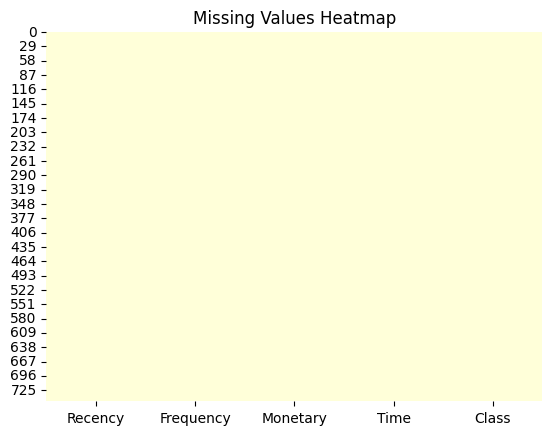

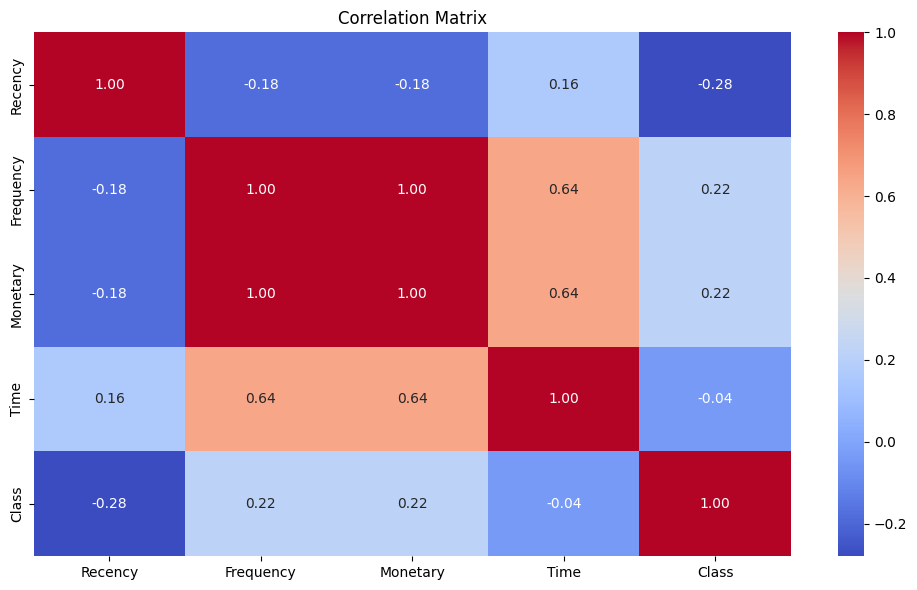

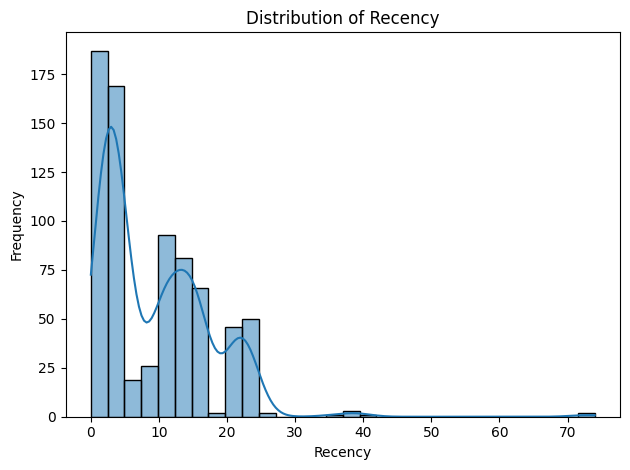

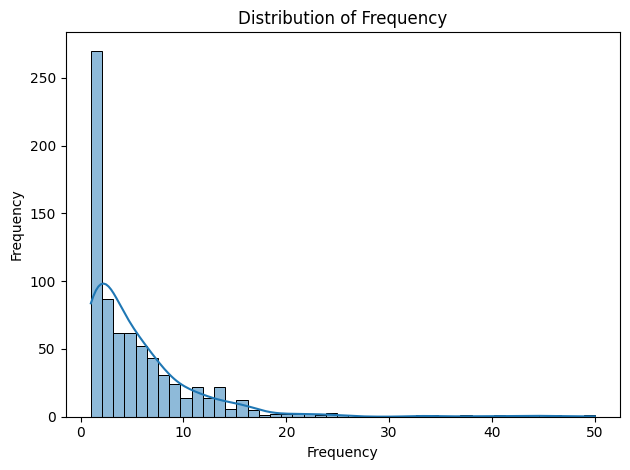

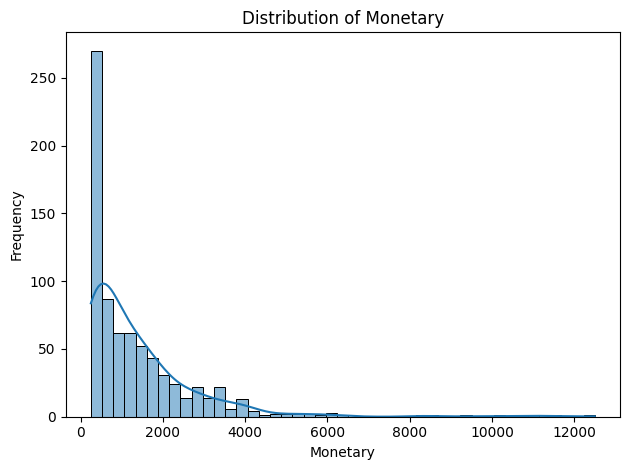

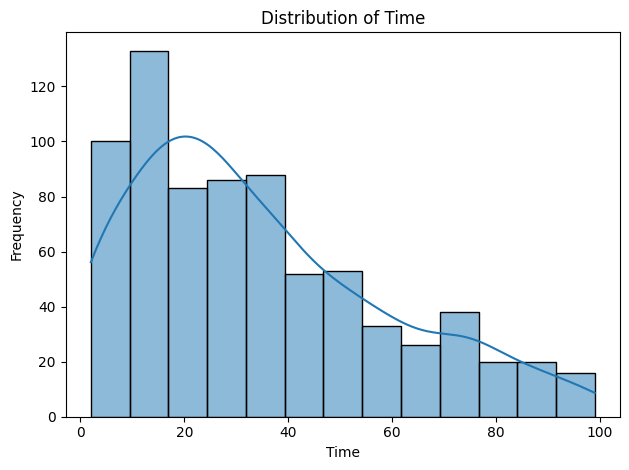

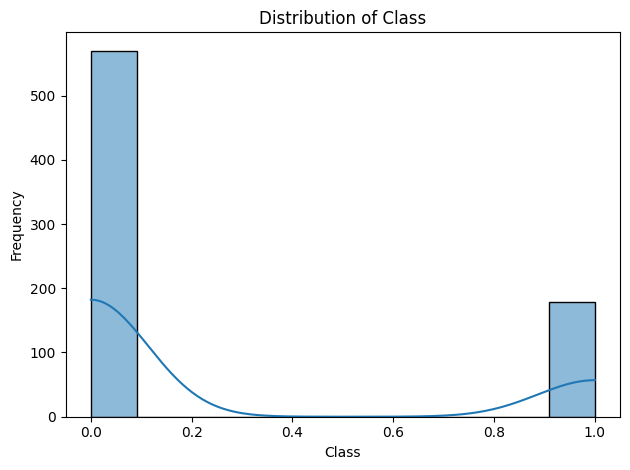

In [7]:
# Re-import libraries after code execution environment reset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../data/blood.csv")

# Enhanced preview of data
print("📌 First 5 Rows of the Dataset:")
print(df.head())

print("\n📊 Statistical Summary:")
print(df.describe(include='all'))

print("\nℹ️ Dataset Info:")
df.info()

# Check for missing values
print("\n🔍 Missing Values Summary:")
print(df.isnull().sum())

# Visualizations
# 1. Heatmap of missing values
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Missing Values Heatmap")
plt.show()

# 2. Correlation heatmap (only numerical columns)
numeric_df = df.select_dtypes(include=["float64", "int64"])
if not numeric_df.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix")
    plt.tight_layout()
    plt.show()

# 3. Distribution plots for numeric columns
for column in numeric_df.columns:
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()
